Practical:

Q1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model
using Seaborn's "diamonds" dataset.

<ipython-input-3-ec1e61a2ab5b>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
<ipython-input-3-ec1e61a2ab5b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mean(), inplace=True)


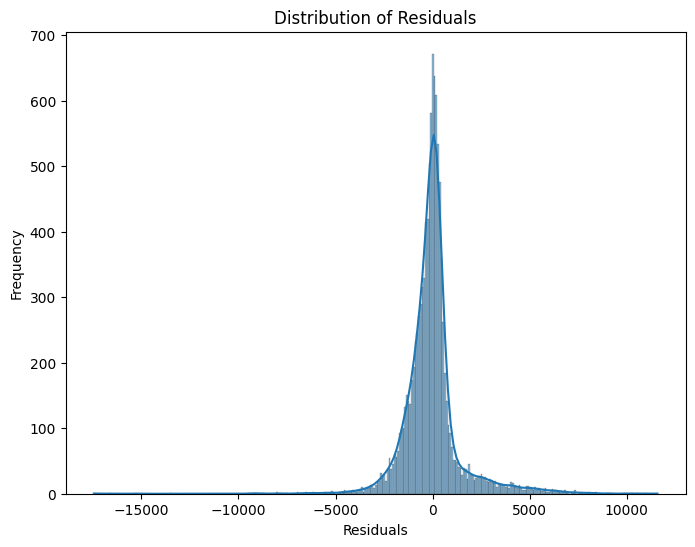

<Figure size 800x600 with 0 Axes>

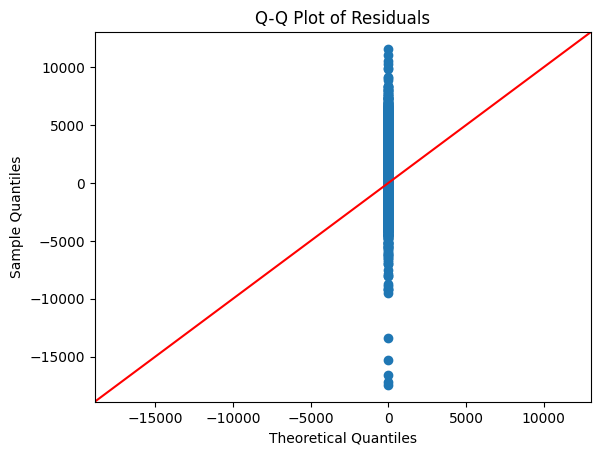

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Prepare the data
# Select features and target variable
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]  # Features
y = diamonds['price']  # Target

# Handle missing values (if any) - Impute with mean for demonstration
for col in X.columns:
    X[col].fillna(X[col].mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred

# Visualize the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


#Optional: Q-Q plot for normality check
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8, 6))
qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

Q2.  Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root
Mean Squared Error (RMSE) for a linear regression model.

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 2242178.9040856035
Mean Absolute Error (MAE): 888.4808633901026
Root Mean Squared Error (RMSE): 1497.3906985438382


Q3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

<ipython-input-5-4e88010a2f3c>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
<ipython-input-5-4e88010a2f3c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mean(), inplace=True)


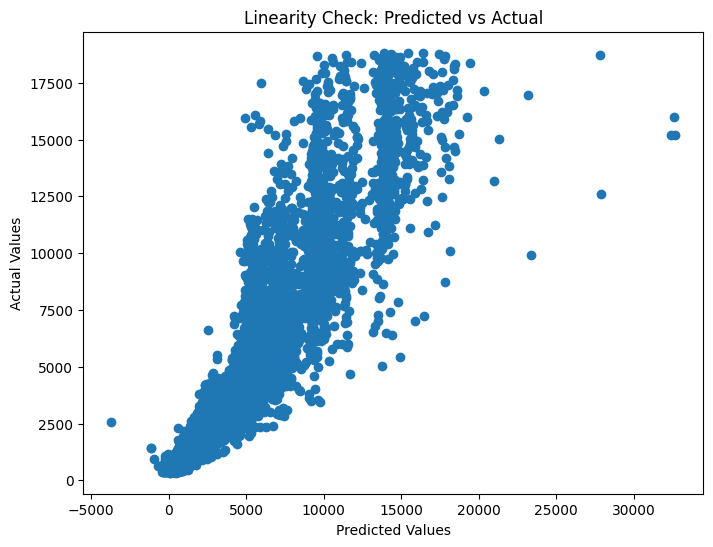

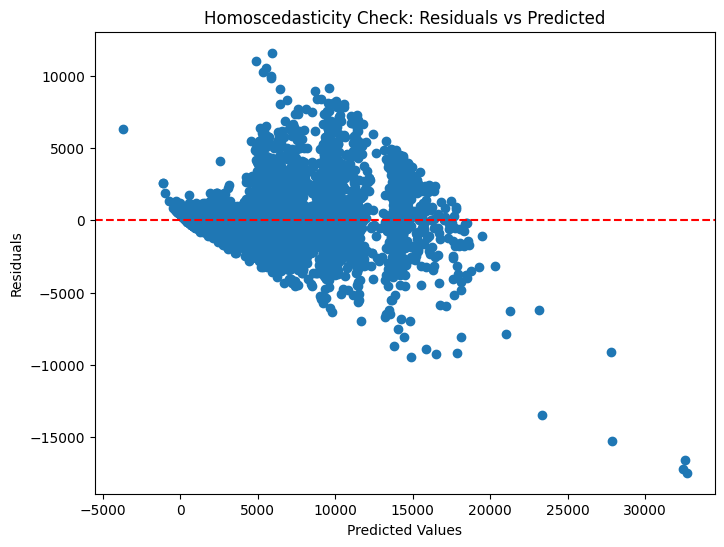

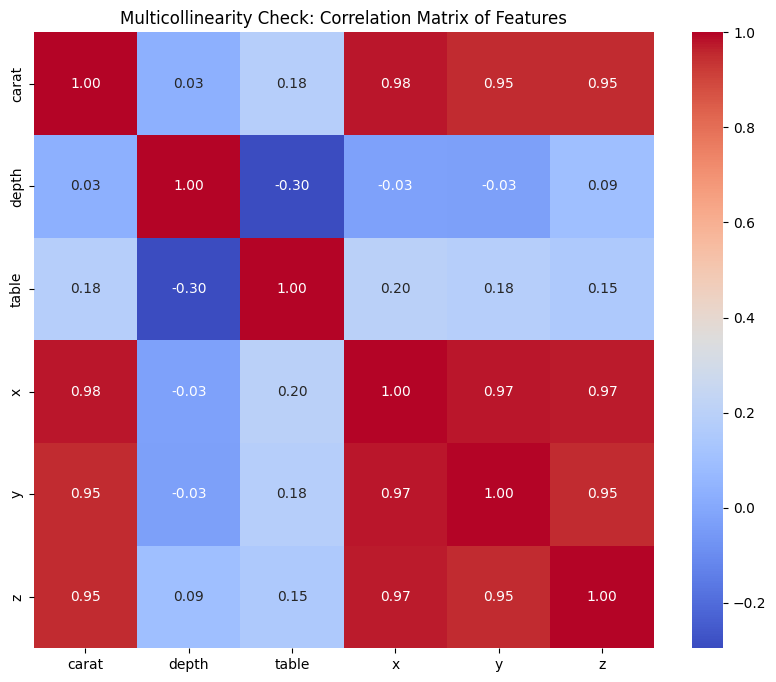

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Prepare the data
# Select features and target variable
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]  # Features
y = diamonds['price']  # Target

# Handle missing values (if any) - Impute with mean for demonstration
for col in X.columns:
    X[col].fillna(X[col].mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (errors)
residuals = y_test - y_pred

# 1. Linearity: Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Linearity Check: Predicted vs Actual")
plt.show()

# 2. Homoscedasticity: Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()


# 3. Multicollinearity: Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Multicollinearity Check: Correlation Matrix of Features")
plt.show()

Q4.  Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the
performance of different regression models?

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Prepare the data (same as before)
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

for col in X.columns:
    X[col].fillna(X[col].mean(), inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR()
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])


# Display results
results_df = pd.DataFrame(results, columns=["Model", "Mean Squared Error", "R-squared"])
results_df

<ipython-input-6-f86ee41b9c17>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)
<ipython-input-6-f86ee41b9c17>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mean(), inplace=True)


,Model,Mean Squared Error,R-squared
0,Linear Regression,2.242179e+06,0.858954
1,Ridge Regression,2.242190e+06,0.858954
2,Lasso Regression,2.242719e+06,0.858920
3,Decision Tree,3.473062e+06,0.781525
4,Random Forest,1.898046e+06,0.880602
5,Support Vector Regression,6.978859e+06,0.560990


Q5.  Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and
R-squared score.

In [7]:
# Assuming you have already loaded the data and split it into X_train, X_test, y_train, y_test as in the provided code.

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate and print the R-squared score
r_squared = model.score(X_test, y_test)
print("R-squared:", r_squared)

Coefficients: [10683.18425966  -204.09955335  -104.26736872 -1286.79957429
    37.63252069    53.39486424]
Intercept: 20976.563736037213
R-squared: 0.8589542625888938


Q6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using
simple linear regression and visualizes the results.

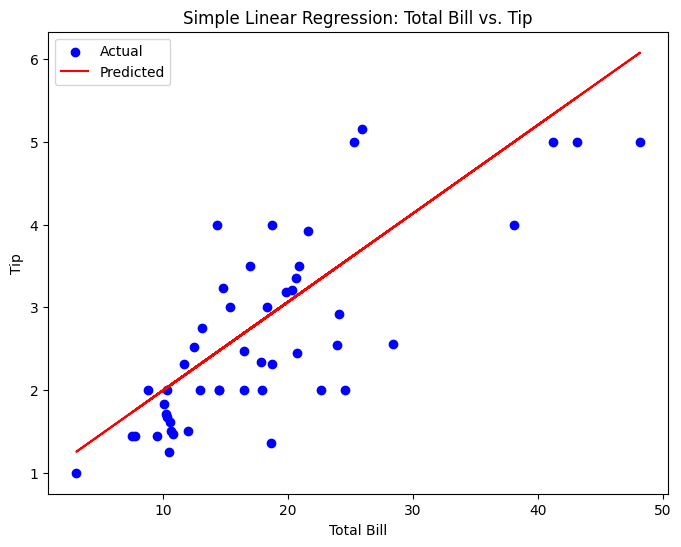

Coefficients: [0.10696371]
Intercept: 0.925235558557056


In [8]:
# Load the tips dataset
tips = sns.load_dataset('tips')

# Prepare the data
X = tips[['total_bill']]  # Feature: total_bill
y = tips['tip']  # Target: tip

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression: Total Bill vs. Tip')
plt.legend()
plt.show()

# Print model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Q7.  Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
model to predict new values and plot the data points along with the regression line.

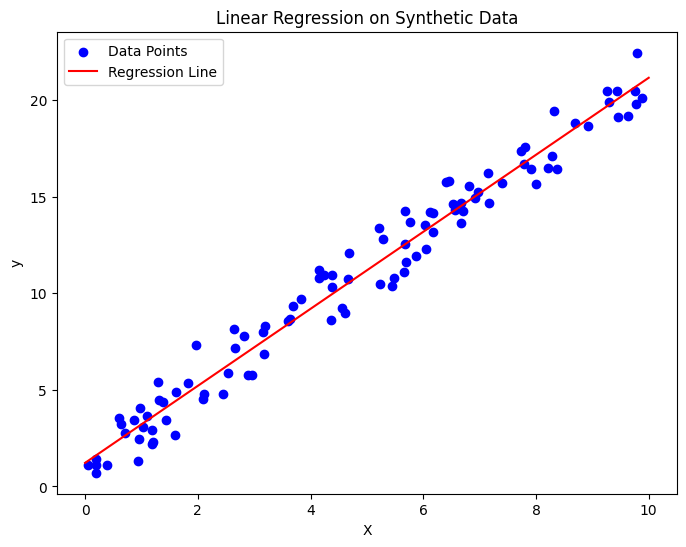

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values
X_new = np.array([[0], [10]])
y_pred = model.predict(X_new)

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

Q8.  Write a Python script that pickles a trained linear regression model and saves it to a file.

In [11]:
import pickle

# Assuming 'model' is your trained linear regression model (as in the previous examples)
# ... (your code to train the model) ...

# Save the model to a file using pickle
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")

Model saved to linear_regression_model.pkl


Q9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
regression curve.

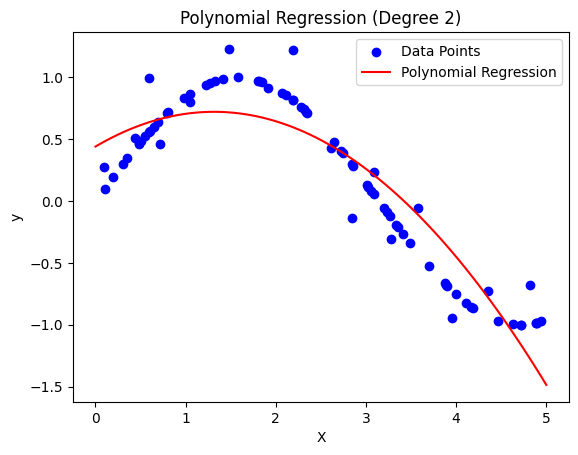

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict values for plotting
X_plot = np.linspace(0, 5, 100).reshape(-1, 1)  # Create a range of x values for smooth plot
X_plot_poly = poly.fit_transform(X_plot)
y_plot_pred = poly_reg.predict(X_plot_poly)


# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_plot, y_plot_pred, color='red', label='Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

Q10.  Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
regression model to the data. Print the model's coefficient and intercept.

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 random X values between 0 and 10
y = 2 * X + 1 + np.random.randn(100, 1)  # y = 2X + 1 + some noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficient and intercept
print("Coefficient:", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

Coefficient: 1.9936935021402045
Intercept: 1.2221510774472257


Q11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and
compares their performance.

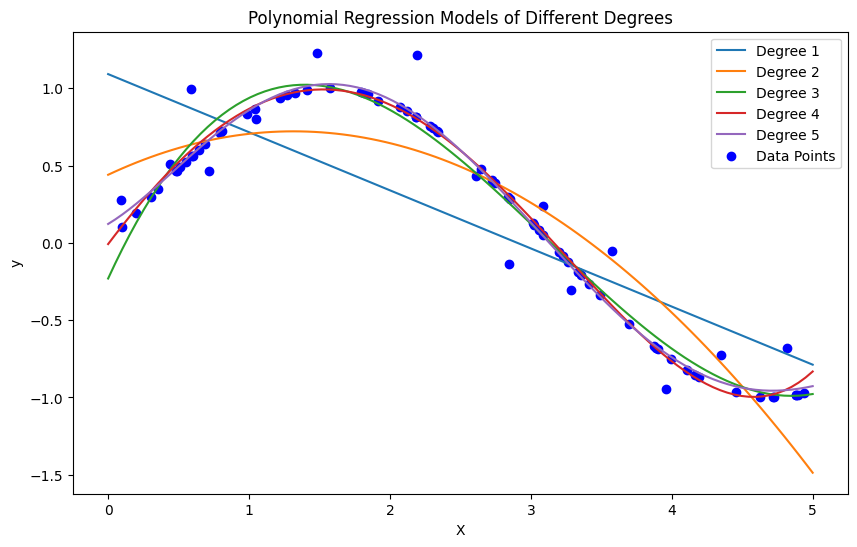

Degree 1: MSE = 0.16145368750276579
Degree 2: MSE = 0.0658486589331983
Degree 3: MSE = 0.016940225041441558
Degree 4: MSE = 0.01368979257509515
Degree 5: MSE = 0.012766173238957207


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))

# Degrees of polynomials to test
degrees = [1, 2, 3, 4, 5]

# Results storage
results = []

# Plot setup
plt.figure(figsize=(10, 6))

# Iterate through different polynomial degrees
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Split data into training and testing sets (optional, but good practice)
    # X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)  # example

    # Train the model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly, y)

    # Evaluate the model (optional - use test data if split)
    y_pred = poly_reg.predict(X_poly) # Predicting on training data for simplicity here
    mse = mean_squared_error(y, y_pred)
    results.append([degree, mse])

    # Plot
    X_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    X_plot_poly = poly.fit_transform(X_plot)
    y_plot_pred = poly_reg.predict(X_plot_poly)
    plt.plot(X_plot, y_plot_pred, label=f'Degree {degree}')


plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Models of Different Degrees')
plt.legend()
plt.show()

# Display results
for degree, mse in results:
  print(f"Degree {degree}: MSE = {mse}")

Q12.  Write a Python script that fits a simple linear regression model with two features and prints the model's
coefficients, intercept, and R-squared score.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data with two features
np.random.seed(0)
X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
y = 2 * X[:, 0] + 3 * X[:, 1] + 1 + np.random.randn(100)  # Target variable with some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model's coefficients, intercept, and R-squared score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X_test, y_test))

Coefficients: [1.95627766 3.00963137]
Intercept: 1.044934960595576
R-squared: 0.9914428136487723


Q13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the
regression line along with the data points.

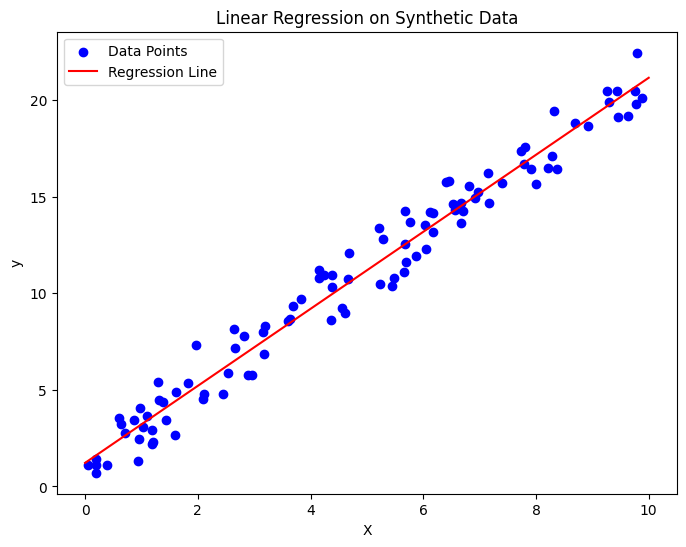

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values
X_new = np.array([[0], [10]])
y_pred = model.predict(X_new)

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

Q14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset
with multiple features.

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your feature matrix (pandas DataFrame or numpy array)
# ... (your code to load or create the dataset and define X) ...
# Example using the diamonds dataset from previous questions
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF values
vif_data

,feature,VIF
0,carat,70.132799
1,depth,515.146274
2,table,500.595341
3,x,1284.949828
4,y,530.998218
5,z,540.677349


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your feature matrix (pandas DataFrame)
# Example: X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns


# Print VIF values
vif_data

,feature
0,feature


Q15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
polynomial regression model, and plots the regression curve.

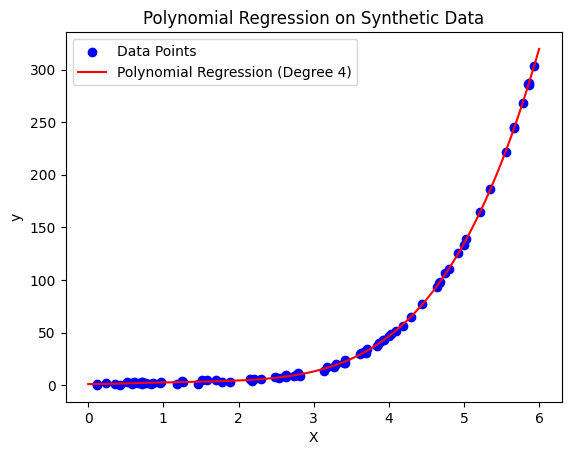

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data with a polynomial relationship (degree 4)
np.random.seed(0)
X = np.sort(6 * np.random.rand(80, 1), axis=0)
y = 0.5 * X**4 - 2 * X**3 + 3 * X**2 - X + 2 + np.random.randn(80, 1)

# Create polynomial features (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict values for plotting
X_plot = np.linspace(0, 6, 100).reshape(-1, 1)  # Create a range of x values for a smooth plot
X_plot_poly = poly.fit_transform(X_plot)
y_plot_pred = poly_reg.predict(X_plot_poly)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_plot, y_plot_pred, color='red', label='Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression on Synthetic Data')
plt.legend()
plt.show()

Q16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
linear regression model, and prints the R-squared score.

In [19]:
# Assuming X and y are your features and target variable respectively
# ... (your code to load and prepare the data) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print the R-squared score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared score: {r_squared}")

R-squared score: 0.5766363290917809


Q17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the
regression curve.

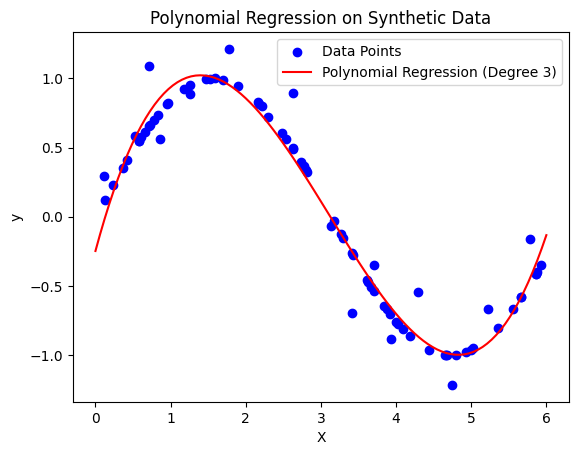

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
np.random.seed(0)
X = np.sort(6 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))

# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Train a linear regression model on the polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Predict values for plotting
X_plot = np.linspace(0, 6, 100).reshape(-1, 1)
X_plot_poly = poly.fit_transform(X_plot)
y_plot_pred = poly_reg.predict(X_plot_poly)

# Plot the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_plot, y_plot_pred, color='red', label='Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression on Synthetic Data')
plt.legend()
plt.show()

Q18.  Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
the R-squared score and model coefficients.




In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 2*X[:, 0] - 3*X[:, 1] + 5*X[:, 2] + X[:, 3] - X[:,4] + 1 + np.random.randn(100) # Target variable with some noise


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the R-squared score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared score: {r_squared}")

# Print the model coefficients
print(f"Model coefficients: {model.coef_}")

R-squared score: 0.8487625956231131
Model coefficients: [ 2.11216988 -3.13364092  5.40110483  1.30214549 -1.25697614]


Q19.  Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
data points along with the regression line.

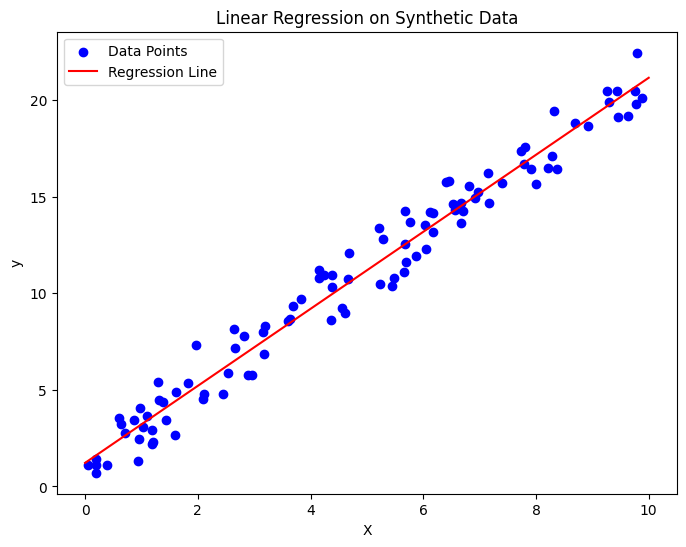

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 1 + np.random.randn(100, 1)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict new values
X_new = np.array([[0], [10]])
y_pred = model.predict(X_new)

# Plot the data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_new, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()

Q20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 2*X[:, 0] - 3*X[:, 1] + 5*X[:, 2] + 1 + np.random.randn(100) # Target variable with some noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the R-squared score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared score: {r_squared}")

# Print the model coefficients
print(f"Model coefficients: {model.coef_}")

R-squared score: 0.772518523866375
Model coefficients: [ 1.86875977 -3.23992178  5.08711696]


Q21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
joblib instead of pickling.

In [24]:
import joblib

# Assuming 'model' is your trained linear regression model
# ... (your code to train the model) ...

# Save the model to a file using joblib
filename = 'linear_regression_model.joblib'
joblib.dump(model, filename)

print(f"Model saved to {filename}")

# Load the model from the file
loaded_model = joblib.load(filename)

# Use the loaded model to make predictions
# ... (your code to use the loaded model) ...

Model saved to linear_regression_model.joblib


Q22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
the Seaborn 'tips' dataset.

In [25]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the tips dataset
tips = sns.load_dataset('tips')

# Identify categorical features
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Perform one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for easier handling
encoded_features = encoder.fit_transform(tips[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Combine encoded features with numerical features
X = pd.concat([tips.drop(columns=categorical_cols), encoded_df], axis=1)
y = tips['tip']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 1.0


Q23.  Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 2*X[:, 0] - 3*X[:, 1] + 5*X[:, 2] + X[:, 3] - X[:,4] + 1 + np.random.randn(100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Linear Regression:")
print("Coefficients:", lr_model.coef_)
print("R-squared:", lr_r2)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("\nRidge Regression:")
print("Coefficients:", ridge_model.coef_)
print("R-squared:", ridge_r2)

Linear Regression:
Coefficients: [ 2.11216988 -3.13364092  5.40110483  1.30214549 -1.25697614]
R-squared: 0.8487625956231131

Ridge Regression:
Coefficients: [ 1.97191108 -2.60701849  4.68397409  1.17853136 -1.00677066]
R-squared: 0.8178750655735718


Q24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic
dataset.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 2*X[:, 0] - 3*X[:, 1] + 5*X[:, 2] + X[:, 3] - X[:,4] + 1 + np.random.randn(100)

# Create a linear regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average R-squared score:", np.mean(cv_scores))

Cross-validation scores: [0.79717324 0.72500898 0.73538567 0.63089706 0.76483805]
Average R-squared score: 0.730660602397826


Q25.  Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic data (replace with your actual data)
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Degrees of polynomials to test
degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    # Predict on the test set
    y_pred = poly_reg.predict(X_test_poly)

    # Calculate and print the R-squared score
    r2 = r2_score(y_test, y_pred)
    print(f"Degree {degree}: R-squared = {r2}")

Degree 1: R-squared = 0.4839229507110894
Degree 2: R-squared = 0.7945509597677468
Degree 3: R-squared = 0.8989565481024194
Degree 4: R-squared = 0.9086558175145375
Degree 5: R-squared = 0.9151306972143022
